In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import backtrader as bt
import datetime

In [2]:
data=pd.read_csv("C:\\Users\\qhaas\\Desktop\\REPO\\GoldPricePredict\\goldstock.csv")
data

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...,...
2506,2528,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2529,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2530,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2531,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


In [4]:
data.isnull().sum()

Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [5]:
data.drop(columns='Unnamed: 0', inplace =True)
data.head()

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


C:\Users\qhaas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\qhaas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


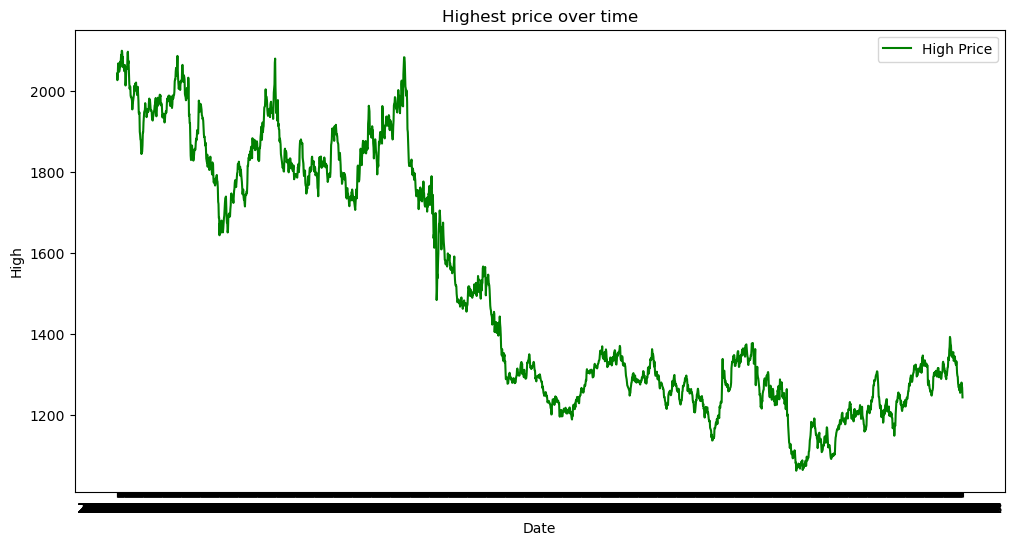

In [6]:
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='Date', y='High', label='High Price', color='green')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Highest price over time')
plt.show()

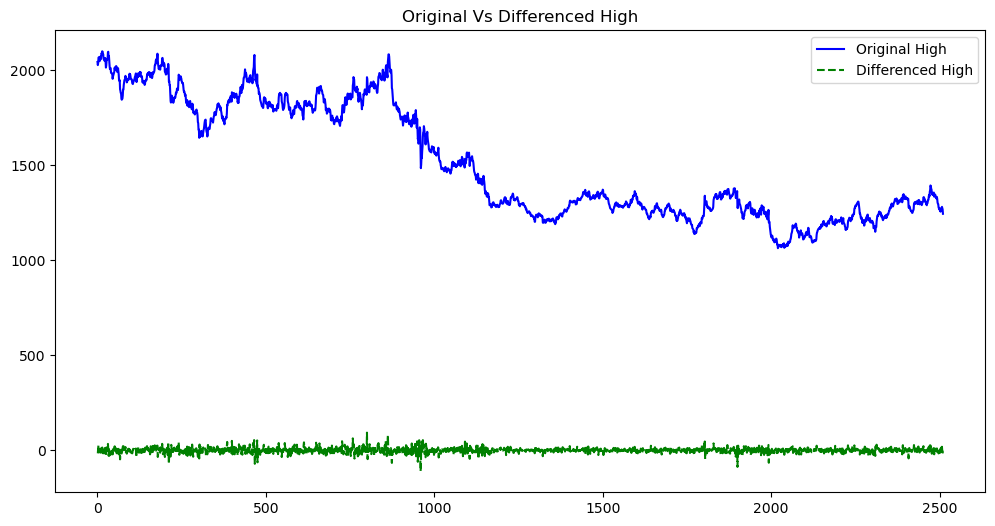

In [7]:
data['high_diff']= data['High'].diff()
plt.figure(figsize=(12,6))
plt.plot(data['High'], label='Original High', color='blue')
plt.plot(data['high_diff'], label='Differenced High', color='green', linestyle='--')
plt.legend()
plt.title('Original Vs Differenced High')
plt.show()

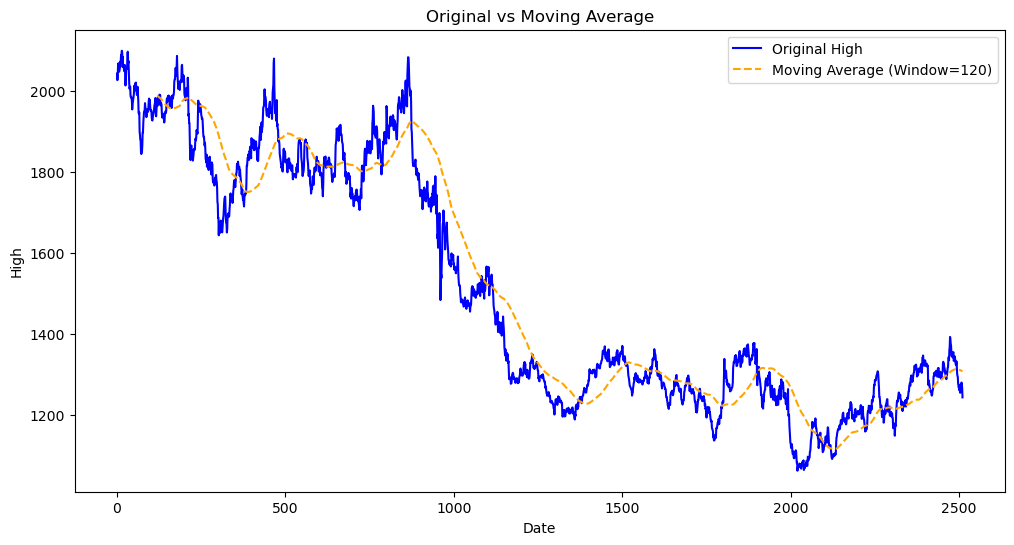

In [8]:
# Moving Average
window_size = 120
data['high_smoothed'] = data['High'].rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(data['High'], label='Original High', color='blue')
plt.plot(data['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

In [9]:
# Create a DataFrame with 'high' and 'high_diff' columns side by side
df_combined = pd.concat([data['High'], data['high_diff']], axis=1)

# Display the combined DataFrame
print(df_combined.head())

     High  high_diff
0  2041.9        NaN
1  2025.6      -16.3
2  2036.1       10.5
3  2062.8       26.7
4  2067.3        4.5


In [10]:
# Create a DataFrame with 'high' and 'high_diff' columns side by side
df_combined = pd.concat([data['High'], data['high_diff']], axis=1)

# Display the combined DataFrame
print(df_combined.head())

     High  high_diff
0  2041.9        NaN
1  2025.6      -16.3
2  2036.1       10.5
3  2062.8       26.7
4  2067.3        4.5


In [11]:
# Remove rows with missing values
data.dropna(subset=['high_diff'], inplace=True)
data['high_diff'].head()

1   -16.3
2    10.5
3    26.7
4     4.5
5   -11.2
Name: high_diff, dtype: float64

In [12]:
result = adfuller(data['high_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -46.49073842508128
p-value: 0.0
Critical Values: {'1%': -3.432959008741782, '5%': -2.862692648021296, '10%': -2.567383598871881}


In [13]:
# Missing Values/Null Values Count
data.isna().sum().sort_values(ascending=False)

high_smoothed    118
Date               0
Close              0
Volume             0
Open               0
High               0
Low                0
high_diff          0
dtype: int64

In [15]:
#spiltting the features and target
X = data.drop(['Date', 'Close','high_smoothed'], axis=1)
y = data['Close']

In [16]:
print(X)

        Volume    Open    High     Low  high_diff
1     167013.0  2009.1  2025.6  2007.7      -16.3
2     245194.0  2031.7  2036.1  2004.6       10.5
3     277995.0  2053.4  2062.8  2027.6       26.7
4     250946.0  2033.2  2067.3  2033.1        4.5
5     270624.0  2029.4  2056.1  2017.3      -11.2
...        ...     ...     ...     ...        ...
2506   81426.0  1254.9  1261.9  1248.0       -8.8
2507   63419.0  1269.9  1280.1  1252.0       18.2
2508   34998.0  1264.3  1273.2  1256.9       -6.9
2509   41697.0  1235.1  1267.1  1230.8       -6.1
2510   80262.0  1240.5  1243.5  1235.5      -23.6

[2510 rows x 5 columns]


In [17]:
X.isnull().sum()

Volume       0
Open         0
High         0
Low          0
high_diff    0
dtype: int64

In [18]:
print(y)

1       2021.6
2       2006.5
3       2030.2
4       2051.6
5       2019.2
         ...  
2506    1250.5
2507    1263.5
2508    1264.5
2509    1262.5
2510    1238.6
Name: Close, Length: 2510, dtype: float64


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [20]:
model1 = LinearRegression()
#training model
model1.fit(X_train, y_train)
#making predictions
predictions = model1.predict(X_test)

In [21]:
# R squared error
error_score = metrics.r2_score(y_test, predictions)
print('R squared error:', error_score)

R squared error: 0.9997085522028422


In [22]:
model = RandomForestRegressor(n_estimators=100)

In [23]:
# training the model
model.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
# prediction on Test Data
test_data_prediction = model.predict(X_test)

In [25]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print('R squared error:', error_score)

R squared error: 0.9994903208269024


In [26]:
y_test = list(y_test)

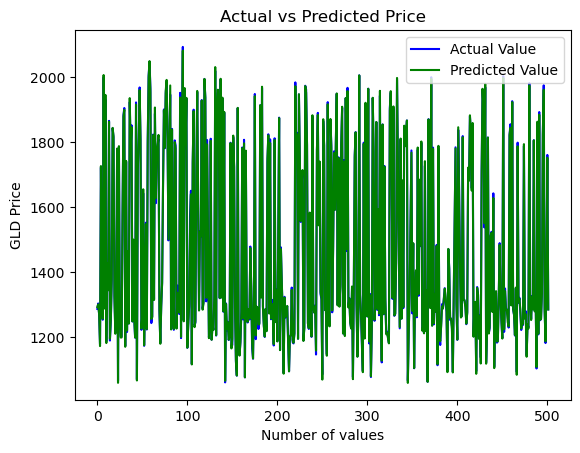

In [27]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [28]:

# Define the strategy
class MeanReversionStrategy(bt.Strategy):
    params = (
        ("ma_period", 20),
        ("rsi_period", 14),
        ("rsi_overbought", 70),
        ("rsi_oversold", 30),
    )

    def __init__(self):
        self.ma = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.ma_period)
        self.rsi = bt.indicators.RelativeStrengthIndex(period=self.params.rsi_period)

    def next(self):
        if self.data.close > self.ma and self.rsi > self.params.rsi_overbought:
            self.sell()  # Overbought, sell
        elif self.data.close < self.ma and self.rsi < self.params.rsi_oversold:
            self.buy()  # Oversold, buy
# Load historical data
data = pd.read_csv("C:\\Users\\qhaas\\Desktop\\REPO\\GoldPricePredict\\goldstock.csv", parse_dates=True, index_col='Date')

# Convert the dataframe to Backtrader data feed
data_feed = bt.feeds.PandasData(dataname=data)

# Create a Backtrader Cerebro engine
cerebro = bt.Cerebro()

# Add the data feed to the engine
cerebro.adddata(data_feed)

# Add the strategy to the engine
cerebro.addstrategy(MeanReversionStrategy)

# Set the initial cash amount
cerebro.broker.set_cash(100000)

# Set the commission - assuming no commission in this example
cerebro.broker.setcommission(commission=0.0)

# Print the starting cash amount
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run the strategy
cerebro.run()

# Print the final cash amount
print('Ending Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Plot the strategy results
cerebro.plot(style='candlestick')

plt.show()

Starting Portfolio Value: 100000.00
Ending Portfolio Value: 100570.10


<IPython.core.display.Javascript object>